In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [125]:
df = pd.read_csv('spam.csv', encoding = 'LATIN-1')

In [126]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [128]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)

In [129]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [130]:
# Encode labels (spam: 1, ham: 0)
df['label_encoded'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,text,label_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [131]:
df.isnull().sum()

label            0
text             0
label_encoded    0
dtype: int64

In [132]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [133]:
df.duplicated().sum()

403

In [134]:
# drop duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [135]:
df.shape

(5169, 3)

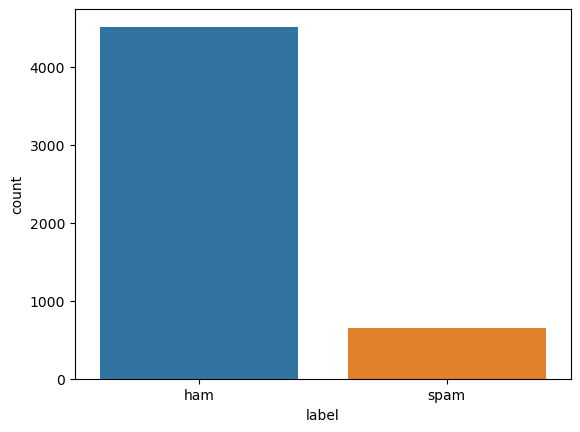

In [136]:
# bar plot of label distribution
sns.countplot(x='label', data=df)
plt.show()

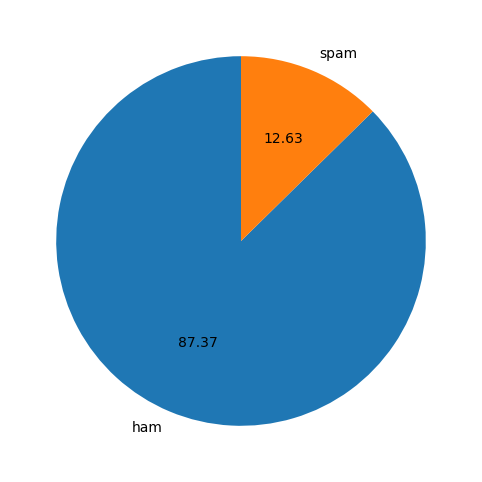

In [137]:
plt.figure(figsize=(10, 6))
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct="%1.2f", startangle=90)
plt.show()

In [138]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['text']).toarray()
y = df['label_encoded']

In [139]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [140]:
# Define the Logistic Regression model
model = LogisticRegression()

In [141]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [142]:
y_pred = model.predict(X_test)

In [143]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['ham', 'spam'])

print(f'Test Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)

Test Accuracy: 0.9603
Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       889
        spam       0.97      0.74      0.84       145

    accuracy                           0.96      1034
   macro avg       0.97      0.87      0.91      1034
weighted avg       0.96      0.96      0.96      1034



In [152]:
# Test cases
test_texts = [
    "Congratulations! You've won a free ticket to the Bahamas. Call now!",
    "Hi John, are we still on for the meeting tomorrow?",
    "Get your free coupon now by clicking here!",
    "Don't forget about the team lunch tomorrow at 1 PM. See you there!",
    "Congratulations! You have won 1,000,000. Claim your prize now!",
    "It was great catching up with you last week. Let's do it again sometime.",
    "Urgent! Your account has been compromised. Please verify your identity."
]

In [153]:
# Convert test texts to TF-IDF features
test_sequences = vectorizer.transform(test_texts).toarray()

# Predict using the trained model
test_predictions = model.predict(test_sequences)

In [154]:
# Display the test case results
for text, prediction in zip(test_texts, test_predictions):
    label = 'spam' if prediction == 1 else 'ham'
    print(f'Text: {text}\nPredicted Label: {label}\n')

Text: Congratulations! You've won a free ticket to the Bahamas. Call now!
Predicted Label: spam

Text: Hi John, are we still on for the meeting tomorrow?
Predicted Label: ham

Text: Get your free coupon now by clicking here!
Predicted Label: spam

Text: Don't forget about the team lunch tomorrow at 1 PM. See you there!
Predicted Label: ham

Text: Congratulations! You have won 1,000,000. Claim your prize now!
Predicted Label: spam

Text: It was great catching up with you last week. Let's do it again sometime.
Predicted Label: ham

Text: Urgent! Your account has been compromised. Please verify your identity.
Predicted Label: ham

